In [21]:
# Importação das bibliotecas necessárias para a execução do código
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, f1_score, precision_score, 
                             recall_score)

# Configurações de estilo para gráficos
sns.set(style='whitegrid')

In [ ]:
pip install numpy 

In [ ]:
pip install pandas 


In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install sklearn

In [ ]:
pip install sklearn.tree

In [ ]:
pip install scikit-learn


In [ ]:
pip install numpy scikit-learn


In [22]:
produtos = pd.read_csv('dados_produtos.csv') #importa dados do arquivos csv

In [23]:
# Mostra as primeiras linhas do DataFrame "produtos" para uma rápida visualização
print(produtos.head())

  product_name  rating  rating_count  purchased
0    Televisão    3.04            29          1
1      Celular    3.46          3872          0
2    Cafeteira    3.25          1187          0
3    Televisão    3.77          4097          1
4    Videogame    5.00          4738          1


In [25]:
# Convertendo a coluna 'product_name' para o tipo string
produtos['product_name'] = produtos['product_name'].apply(str)

In [26]:
# Contabiliza a frequência de cada nome de produto na coluna 'product_name'
frequencia_produtos = produtos['product_name'].value_counts()
print(frequencia_produtos)


product_name
Celular      21
Televisão    19
iPod         18
Videogame    17
Notebook     16
Cafeteira     9
Name: count, dtype: int64


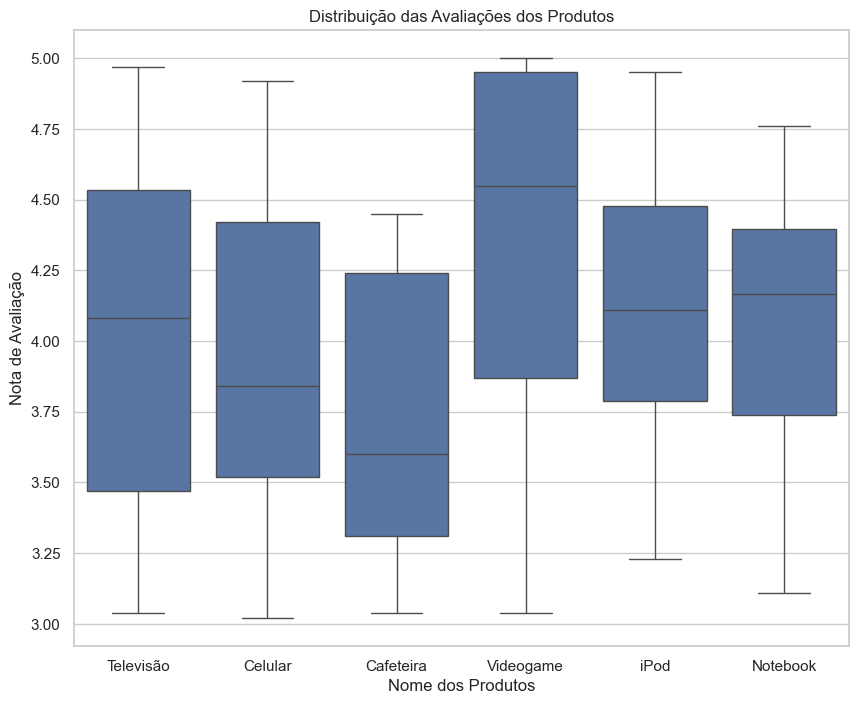

In [27]:
# Define o tamanho da figura para o boxplot
plt.figure(figsize=(10, 8))

# Cria um boxplot para visualizar as avaliações dos produtos
sns.boxplot(x='product_name', y='rating', data=produtos)

# Configurações do gráfico
plt.title("Distribuição das Avaliações dos Produtos")
plt.xlabel('Nome dos Produtos')
plt.ylabel('Nota de Avaliação')

# Exibe o gráfico
plt.show()

In [28]:
# Exibe informações sobre o DataFrame para identificar dados inválidos
produtos.info()

# Atualizando os nomes das colunas para melhor legibilidade
novos_nomes_colunas = {
    'product_name': 'Nome_Produtos',
    'rating': 'Avaliações',
    'rating_count': 'Quantidade_Avaliações',
    'purchased': 'Compraram'
}

produtos.rename(columns=novos_nomes_colunas, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [29]:
# Exibe as primeiras linhas do DataFrame para verificar se os nomes das colunas foram alterados corretamente
print(produtos.head())


  Nome_Produtos  Avaliações  Quantidade_Avaliações  Compraram
0     Televisão        3.04                     29          1
1       Celular        3.46                   3872          0
2     Cafeteira        3.25                   1187          0
3     Televisão        3.77                   4097          1
4     Videogame        5.00                   4738          1


In [38]:
# Selecionando as colunas importantes para a análise
dados_atributos = produtos[['Avaliações', 'Quantidade_Avaliações']]
dados_resposta = produtos['Compraram']


In [40]:
# Dividindo os dados em conjuntos de treinamento e teste
conjunto_treinamento, conjunto_teste, rotulos_treinamento, rotulos_teste = train_test_split(dados_atributos, dados_resposta , test_size=0.3, random_state=42)


In [42]:
# Inicializando o classificador de árvore de decisão
modelo = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com os dados de treinamento
modelo.fit(dados_atributos, dados_resposta)


DecisionTreeClassifier(random_state=42)

In [43]:
# Criando um dicionário para armazenar os modelos treinados por produto
modelos_por_categoria = {}

# Armazenando o modelo treinado para o produto 'Televisão'
modelos_por_categoria['Televisão'] = modelo


In [47]:
modelos_por_categoria['Televisão'] = modelo

Acurácia: 1.0
Matriz de Confusão:
 [[ 9  0]
 [ 0 21]]


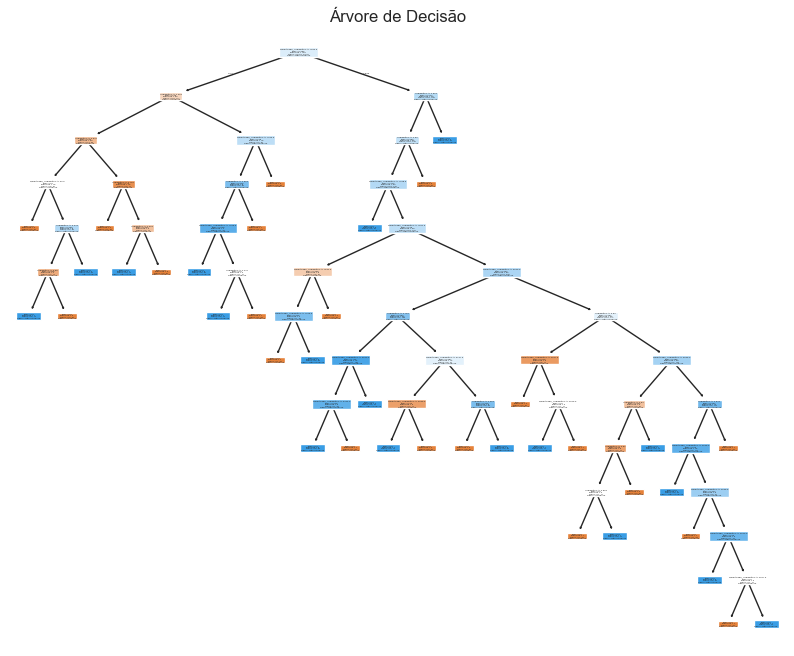

In [74]:
prev = modelo.predict(conjunto_teste)
acuracia = accuracy_score(rotulos_teste, prev)
matrix = confusion_matrix(rotulos_teste, prev)

print("Acurácia:", acuracia)
print("Matriz de Confusão:\n", matrix)

produtos['Compraram'] = produtos['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])

fig = plt.figure(figsize=(10, 8))
tree.plot_tree(modelo, 
               feature_names=dados_atributos.columns.tolist(), 
               class_names=['Comprou', 'Não Comprou'], 
               filled=True)

plt.title("Árvore de Decisão")
plt.show()


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Acurácia: 0.5
F1 Score: 0.5
Precision Score: 0.6666666666666666
Recall Score: 0.6666666666666666
Matriz de Confusão: 
[[1 2]
 [0 1]]

Visualização da Árvore:


C:\Users\dsadm\AppData\Local\Temp\ipykernel_22784\2646179638.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


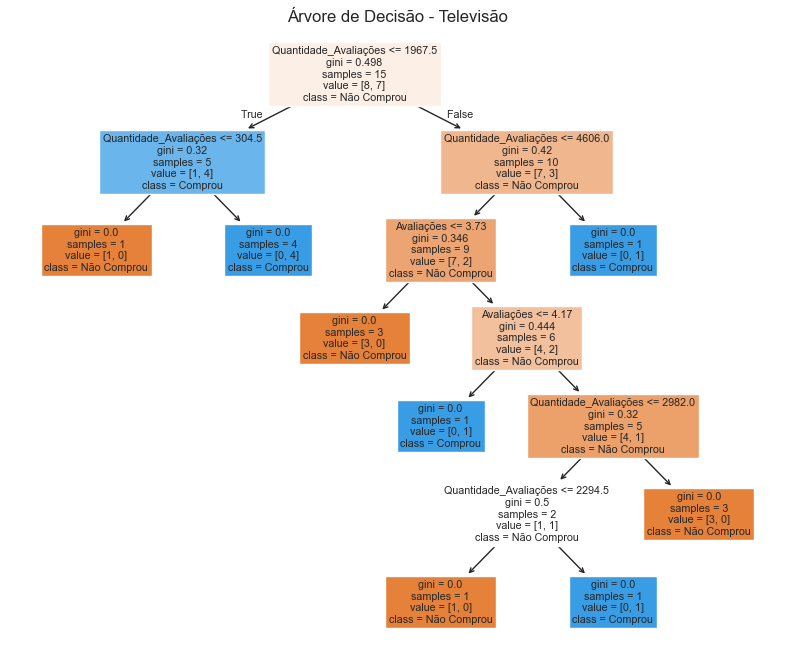


--------------------------- Árvore de Decisão do Produto Celular ---------------------------------

Avaliação do Modelo: 

Acurácia: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.75
Recall Score: 0.6666666666666666
Matriz de Confusão: 
[[2 0]
 [2 1]]

Visualização da Árvore:


C:\Users\dsadm\AppData\Local\Temp\ipykernel_22784\2646179638.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


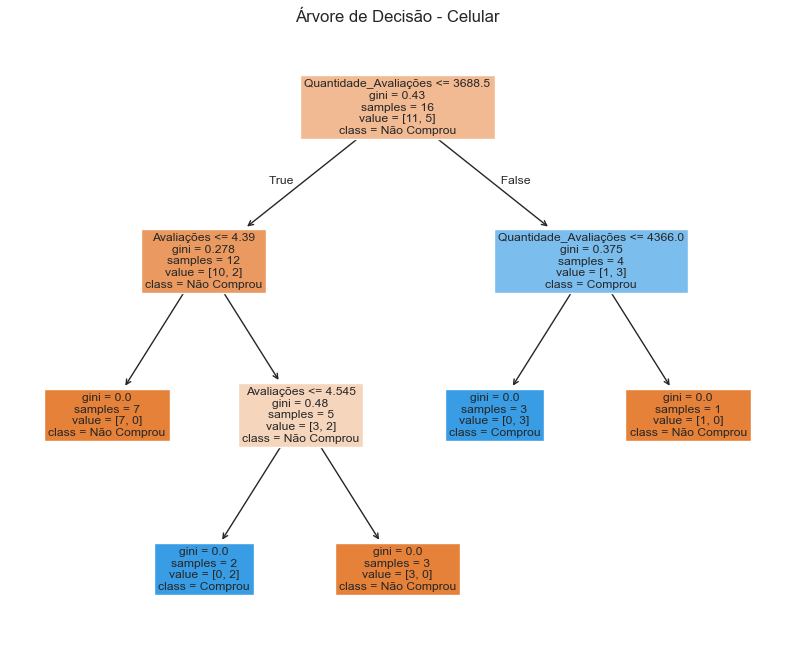


--------------------------- Árvore de Decisão do Produto Cafeteira ---------------------------------

Avaliação do Modelo: 

Acurácia: 0.5
F1 Score: 0.0
Precision Score: 0.25
Recall Score: 0.5
Matriz de Confusão: 
[[0 1]
 [0 1]]

Visualização da Árvore:


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsadm\AppData\Local\Temp\ipykernel_22784\2646179638.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


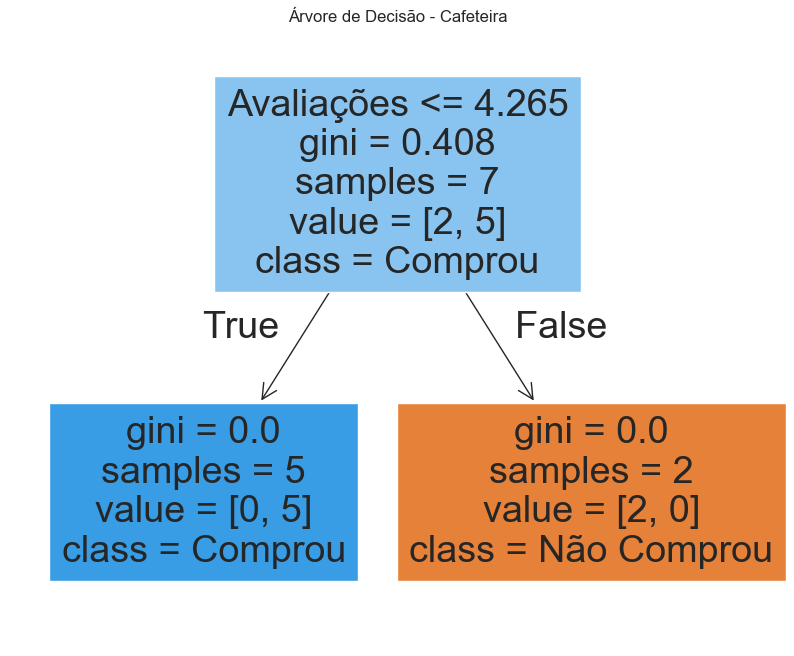


--------------------------- Árvore de Decisão do Produto Videogame ---------------------------------

Avaliação do Modelo: 

Acurácia: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Matriz de Confusão: 
[[4]]

Visualização da Árvore:


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\dsadm\AppData\Local\Temp\ipykernel_22784\2646179638.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


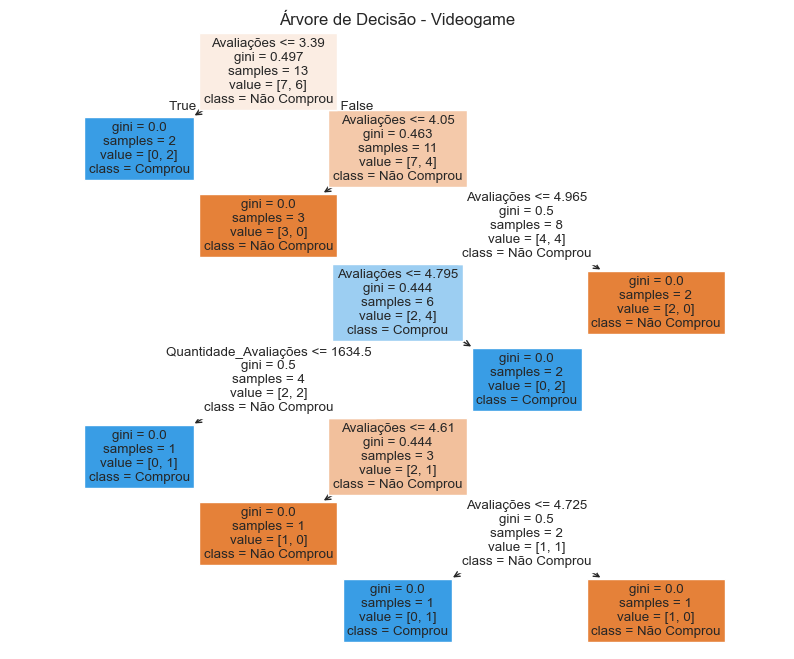


--------------------------- Árvore de Decisão do Produto iPod ---------------------------------

Avaliação do Modelo: 

Acurácia: 0.25
F1 Score: 0.0
Precision Score: 0.16666666666666666
Recall Score: 0.25
Matriz de Confusão: 
[[0 2]
 [1 1]]

Visualização da Árvore:


C:\Users\dsadm\AppData\Local\Temp\ipykernel_22784\2646179638.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


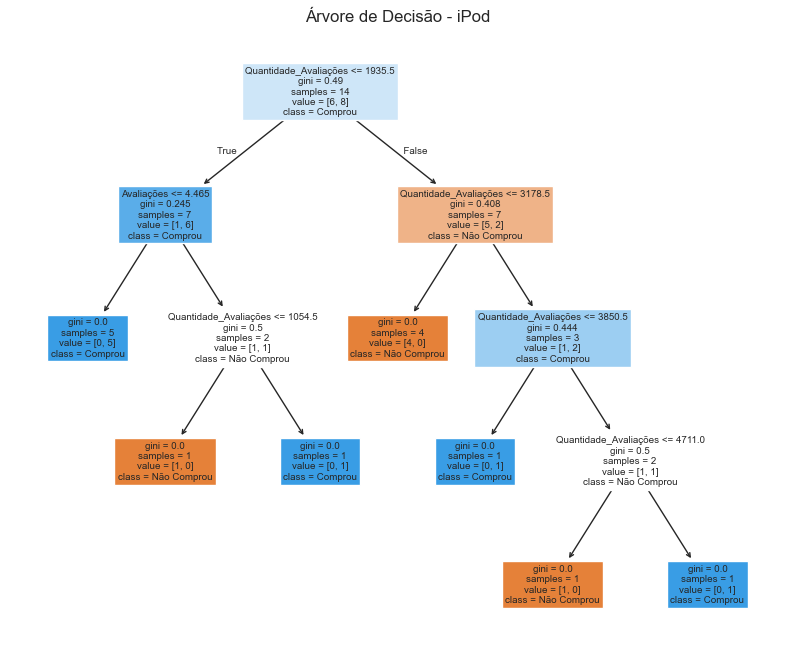


--------------------------- Árvore de Decisão do Produto Notebook ---------------------------------

Avaliação do Modelo: 

Acurácia: 0.75
F1 Score: 0.6666666666666666
Precision Score: 0.75
Recall Score: 0.8333333333333333
Matriz de Confusão: 
[[1 0]
 [1 2]]

Visualização da Árvore:


C:\Users\dsadm\AppData\Local\Temp\ipykernel_22784\2646179638.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


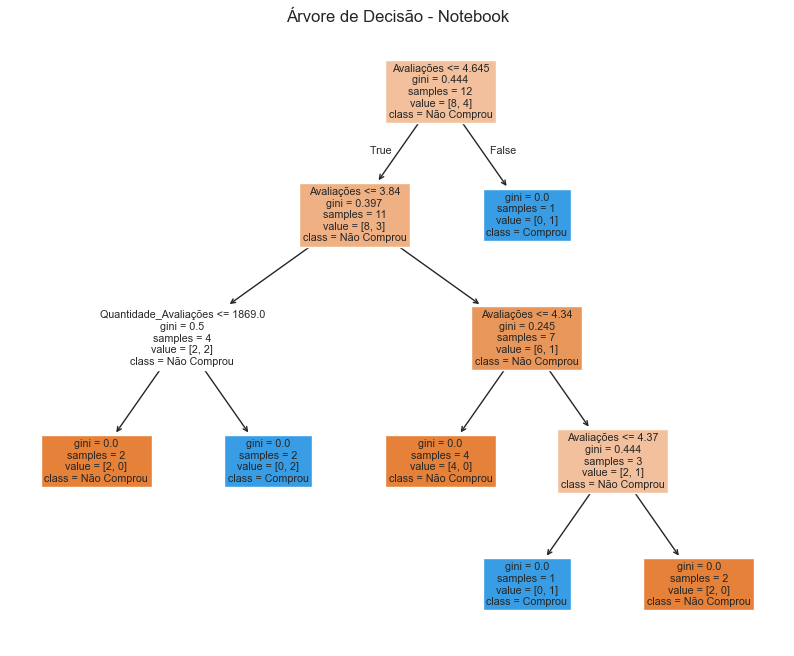

In [75]:
products = produtos['Nome_Produtos'].unique()

for product in products:
    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = produtos.loc[produtos['Nome_Produtos'] == product]

    x = product_df.drop(['Compraram', 'Nome_Produtos'], axis=1)
    y = product_df['Compraram']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred, pos_label="Comprou")}')
    print(f'Precision Score: {precision_score(y_test, y_pred, average="macro")}')
    print(f'Recall Score: {recall_score(y_test, y_pred, average="macro")}')
    print(f'Matriz de Confusão: \n{confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore:')
    
    product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=x.columns, class_names=['Não Comprou', 'Comprou'], filled=True)
    plt.title(f'Árvore de Decisão - {product}')
    plt.show()
